In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Find/Union Algorithm for the percolation problem

In [86]:
class FindUnion:
    def __init__(self,n):
        self.matrix = np.zeros((n,n))
        self.pointer_matrix = np.zeros((n,n))
        self.cluster_dictionary = {}
        self.indices = 0
        self.iteration = 0
    
    def one_block(self, matrix):
        """
        Write a 1 in a given matrix at random.
        """
        self.indices = zip(*np.where(self.matrix == 0))
        np.random.shuffle(self.indices)
        (ind_0,ind_1) = self.indices[0]
        matrix[ind_0][ind_1] = 1
        return ind_0,ind_1
    
    def negbrs(self,i,j):
        """
        Give neighbor indices
        """
        return (i-1,j), (i+1,j), (i,j-1), (i,j+1)
        
    def dict_key_g_value(self,val):
        """
        Print a key for a given value that already exists on dictionary
        """
        return self.cluster_dictionary.keys()[self.cluster_dictionary.values().index(val)]
    
    def last_key(self,dictionary):
        """
        give the last key for a dictionary
        """
        return self.cluster_dictionary.keys()[-1]
    
    def update_dict(self,key,value):
        """Update the dictionary if there is a existing key"""
        self.cluster_dictionary[key] = self.cluster_dictionary[key], value
    
    def image_matrix(self):
        """Plot image of the matrix"""
        plt.imshow(self.matrix)
        plt.show()
    
    def write_block(self):
        """
        write a 1 in the matrix and feeds cluster dictionary
        """
        ind_0,ind_1 = self.one_block(self.matrix)
        neighbors = self.negbrs(ind_0,ind_1)
        check_neighbors = False   
        for i in neighbors:
            for j in self.cluster_dictionary.values():
                if i in j:
                    self.cluster_dictionary[self.dict_key_g_value(j)].append((ind_0,ind_1))
                    check_neighbors = True
                    break

        if check_neighbors == False:
            self.cluster_dictionary[self.iteration] = [(ind_0,ind_1)]
        self.iteration += 1
    
    def iterate(self,m, plot= False):
        """
        Do m iterations.
        Plot these interactions puting plot = True
        """
        for _ in range(m):
            self.write_block()
            if plot == True:
                plt.imshow(self.matrix)
                plt.show()
        

In [87]:
n = 3
b = FindUnion(n)

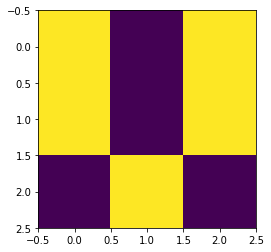

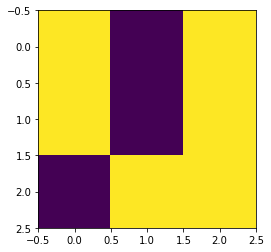

In [91]:
b.iterate(2, plot= True)

In [92]:
b.cluster_dictionary

{0: [(2, 1), (2, 2)], 1: [(1, 2), (0, 2), (2, 2)], 2: [(0, 0), (1, 0)]}